In [1]:
import pandas as pd
from io import StringIO

with open('sed_fitting.txt', 'r') as file:
    data = file.read()

# print(data)
# Convert the string data to a pandas dataframe
data_io = StringIO(data)
df = pd.read_csv(data_io, delim_whitespace=True)
df.head()

/tmp/ipykernel_77253/484445271.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_io, delim_whitespace=True)


,id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.CTIO_MosaicII.U,bayes.CTIO_MosaicII.U_err,bayes.KPNOU,...,best.subaru.suprime.NB816,best.subaru.suprime.IB827,best.cfht.wircam.J,best.cfht.wircam.H,best.cfht.wircam.Ks,best.KPNOU,best.CTIO_MosaicII.U,best.ukirt.J,best.ukirt.H,best.ukirt.Ks
0,1255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1256.0,0.404352,0.118183,0.286748,0.098536,0.419717,0.111300,0.000534,0.000029,0.000534,...,0.001714,0.001742,0.002392,0.002416,0.002292,0.000508,0.000507,0.002389,0.002411,0.002289
2,1254.0,15.156090,0.757804,13.326380,0.666319,16.509585,0.825479,0.000378,0.000002,0.000388,...,0.002746,0.003044,0.008257,0.013112,0.017855,0.000386,0.000377,0.008185,0.013150,0.017947
3,1257.0,4.972378,0.995571,4.822505,0.943935,5.064805,0.988027,0.000888,0.000028,0.000875,...,0.000868,0.000875,0.001712,0.001747,0.001782,0.000852,0.000858,0.001718,0.001756,0.001780
4,1259.0,10.718733,4.050585,9.551223,3.905959,10.851936,4.059641,0.000530,0.000034,0.000538,...,0.000718,0.000722,0.001827,0.001962,0.001883,0.000554,0.000547,0.001765,0.001966,0.001882


In [2]:
df.isna().sum()

id                           0
bayes.sfh.sfr               28
bayes.sfh.sfr_err           28
bayes.sfh.sfr100Myrs        28
bayes.sfh.sfr100Myrs_err    28
                            ..
best.KPNOU                  28
best.CTIO_MosaicII.U        28
best.ukirt.J                28
best.ukirt.H                28
best.ukirt.Ks               28
Length: 207, dtype: int64

In [60]:
# [col for col in df.columns if 'best.' in col]
df_filters_best = df[df.columns[df.columns.get_loc('best.stellar.n_ly_young') + 1:]].copy()
df_filters_best.head()

,best.cfht.megacam.u,best.cfht.megacam.g,best.cfht.megacam.r,best.cfht.megacam.inew,best.cfht.megacam.z,best.SUBARU_V,best.SUBARU_r,best.SUBARU_i,best.SUBARU_z,best.SUBARU_g,...,best.subaru.suprime.NB816,best.subaru.suprime.IB827,best.cfht.wircam.J,best.cfht.wircam.H,best.cfht.wircam.Ks,best.KPNOU,best.CTIO_MosaicII.U,best.ukirt.J,best.ukirt.H,best.ukirt.Ks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000516,0.000650,0.001294,0.001635,0.001876,0.000791,0.001259,0.001656,0.001932,0.000622,...,0.001714,0.001742,0.002392,0.002416,0.002292,0.000508,0.000507,0.002389,0.002411,0.002289
2,0.000416,0.000582,0.000985,0.001770,0.003861,0.000709,0.000973,0.001860,0.004121,0.000560,...,0.002746,0.003044,0.008257,0.013112,0.017855,0.000386,0.000377,0.008185,0.013150,0.017947
3,0.000852,0.000835,0.000807,0.000835,0.000903,0.000822,0.000807,0.000840,0.000917,0.000838,...,0.000868,0.000875,0.001712,0.001747,0.001782,0.000852,0.000858,0.001718,0.001756,0.001780
4,0.000568,0.000596,0.000615,0.000679,0.000768,0.000603,0.000615,0.000684,0.000783,0.000595,...,0.000718,0.000722,0.001827,0.001962,0.001883,0.000554,0.000547,0.001765,0.001966,0.001882


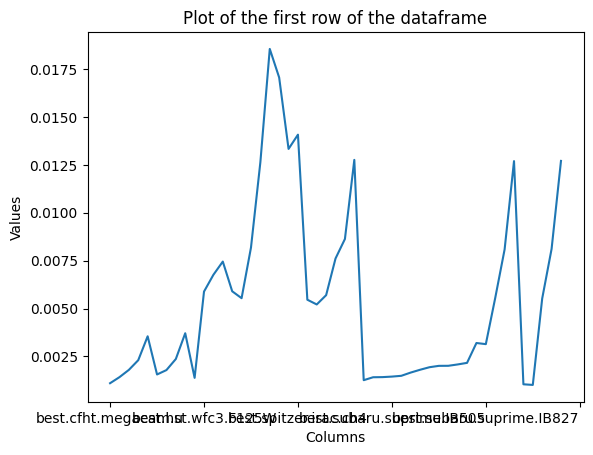

In [61]:
import matplotlib.pyplot as plt

# Select the first row
row = df_filters_best.iloc[890]

# Plot the row
row.plot()
plt.title('Plot of the first row of the dataframe')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [62]:
## https://cosmos.astro.caltech.edu/page/filterset
filters = {
    'CFHT_U': 3823.29,
    'CFHT_G': 4877.37,
    'CFHT_R': 6230.62,
    'CFHT_I': 7617.66,
    'CFHT_Z': 8827.98,
    'CFHT_Ks':2159,

    'NEWFIRM_J1': 10468.80,
    'NEWFIRM_J2': 11954.16,
    'NEWFIRM_J3': 12784.78,
    'NEWFIRM_H1': 15608.68,
    'NEWFIRM_H2': 17072.10,
    'NEWFIRM_K': 21718.94,

    'WIRCAM_J': 1254,
    'WIRCAM_H': 1636,

    'ACS_F435W':4360.06,
    'ACS_F606W': 6035.73,
    'ACS_F775W': 7730.77,
    'ACS_F814W': 8129.21,
    'ACS_F850LP': 9055.73,
    'ACS_F606W': 5962.23,
    'ACS_F850LP': 9080.26,

    'WFC3_F098M': 9864.7,
    'WFC3_F105W': 10552.00,
    'WFC3_F125W': 12501.04,
    'WFC3_F140W': 13970.98,
    'WFC3_F160W': 15418.27,
    'WFC3_F275W': 2709.7,

    'IRAC_CH1': 35634.28,
    'IRAC_CH2': 45110.13,
    'IRAC_CH3': 57593.39,
    'IRAC_CH4': 79594.95,

    'CTIO_U': 3623.00 ,
    'ISAAC_Ks':21600,
    'KPNO_U':3647.65,
    'LBC_U':3579.29,
    'MOIRCS_K':22041.66,

    'SUBARU_B':4458.32,
    'SUBARU_V':5477.83,
    'SUBARU_R':6288.71,
    'SUBARU_i':7683.88, 
    'SUBARU_z':9036.88,
    'SUBARU_g':4777.07,

    'Subaru_NB_427':4263.45,
    'Subaru_NB_464':4635.13,
    'Subaru_NB_484':4849.20,
    'Subaru_NB_505':5049.92,
    'Subaru_NB_527':5261.13,
    'Subaru_NB_574':5764.76,
    'Subaru_NB_624':6233.09,
    'Subaru_NB_679':6781.13,
    'Subaru_NB_709':7073.63,
    'Subaru_NB_738':7361.56,
    'Subaru_NB_767':7684.89,
    'Subaru_NB_711':7119.88,
    'Subaru_NB_816':8149.39,
    'Subaru_NB_827':8244.53,

    'HAWKI_Ks': 21484.49,
    'HAWKI_Y': 10201.62,

    'UKIDSSDR8_J': 12528.07,
    'UKIDSSDR8_H': 16422.88,
    'UKIDSSDR8_K': 22131.99,

    'UltraVISTA_Y': 10223.08,
    'UltraVISTA_J':12555.79,
    'UltraVISTA_H': 16498.72,
    'UltraVISTA_Ks': 21577.90,

    'VIMOS_U': 3720.47,


}

In [63]:
import numpy as np
wavelength = np.array([
    3823.29, 4877.37, 6230.62, 7617.66, 8827.98, 5477.83, 6288.71, 7683.88, 9036.88, 4777.07,
    12501.04, 13970.98, 15418.27, 10223.08, 12555.79, 16498.72, 21577.90, 35634.28, 45110.13, 57593.39,
    79594.95, 10468.80, 11954.16, 12784.78, 15608.68, 17072.10, 21718.94, 4263.45, 4635.13, 4849.20,
    5049.92, 5261.13, 5764.76, 6233.09, 6781.13, 7073.63, 7119.88, 7361.56, 7684.89, 8149.39,
    8244.53, 1254, 1636, 2159, 3647.65, 3623.00, 12528.07, 16422.88, 22131.99
])


In [64]:
len(df_filters_best.columns) ==len(wavelength)

True

In [75]:
df_filters_best.iloc[30].values

array([6.58680894e-05, 9.22082773e-05, 1.44399087e-04, 2.42866241e-04,
       5.27246307e-04, 1.06688777e-04, 1.42705650e-04, 2.52280198e-04,
       5.97622001e-04, 8.94138827e-05, 1.53216372e-03, 2.00478600e-03,
       2.50779405e-03, 9.47870203e-04, 1.56967549e-03, 2.82645765e-03,
       4.77427113e-03, 8.26345875e-03, 7.94717559e-03, 5.99134140e-03,
       5.15501865e-03, 1.04723591e-03, 1.37881243e-03, 1.65031126e-03,
       2.54561531e-03, 3.06780962e-03, 4.83928344e-03, 7.72505727e-05,
       9.09217880e-05, 9.58912512e-05, 9.45931522e-05, 9.98499925e-05,
       1.20272329e-04, 1.42141614e-04, 1.77541794e-04, 1.97940340e-04,
       2.05421567e-04, 2.14167000e-04, 2.39788736e-04, 3.29328575e-04,
       3.59417655e-04, 1.57789241e-03, 2.77648960e-03, 4.77619153e-03,
       6.09706657e-05, 5.87001380e-05, 1.56144005e-03, 2.79123068e-03,
       4.78632306e-03])

In [76]:
flux = []
for index, _ in df_filters_best.iterrows():
    flux.append(df_filters_best.iloc[index].values)
flux

[array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 array([0.00051605, 0.00064979, 0.00129446, 0.00163543, 0.00187631,
        0.00079132, 0.00125866, 0.00165616, 0.00193171, 0.00062228,
        0.00236078, 0.00241106, 0.00241846, 0.00242368, 0.0023838 ,
        0.00240731, 0.00229107, 0.00155724, 0.00111156, 0.00083166,
        0.00051304, 0.00236555, 0.00235697, 0.00239156, 0.00242044,
        0.00238989, 0.00228661, 0.00055623, 0.00061042, 0.00063548,
        0.00066273, 0.0007096 , 0.00088118, 0.00141259, 0.00150429,
        0.00156307, 0.00156328, 0.00159821, 0.00168925, 0.00171419,
        0.00174176, 0.00239183, 0.00241565, 0.00229221, 0.0005076 ,
        0.00050699, 0.002389  , 0.00241059, 0.00228904]),
 array([0.00041559, 0.00058209, 0.00098549, 0.00176

In [77]:
# Repeat the wavelength array to match the number of rows in the dataframe
df_filters_best['flux'] = flux
df_filters_best['wavelength'] = [wavelength]*len(df_filters_best)

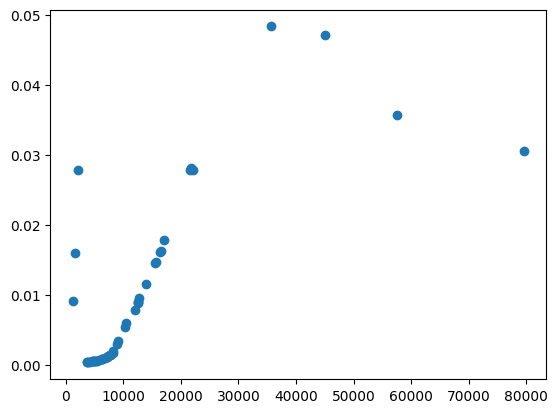

In [78]:
plt.scatter(df_filters_best['wavelength'][0], df_filters_best['flux'][10])

In [79]:
df_filters_best.head()

,best.cfht.megacam.u,best.cfht.megacam.g,best.cfht.megacam.r,best.cfht.megacam.inew,best.cfht.megacam.z,best.SUBARU_V,best.SUBARU_r,best.SUBARU_i,best.SUBARU_z,best.SUBARU_g,...,best.cfht.wircam.J,best.cfht.wircam.H,best.cfht.wircam.Ks,best.KPNOU,best.CTIO_MosaicII.U,best.ukirt.J,best.ukirt.H,best.ukirt.Ks,flux,wavelength
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ..."
1,0.000516,0.000650,0.001294,0.001635,0.001876,0.000791,0.001259,0.001656,0.001932,0.000622,...,0.002392,0.002416,0.002292,0.000508,0.000507,0.002389,0.002411,0.002289,"[0.0005160503734382, 0.0006497872359011, 0.001...","[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ..."
2,0.000416,0.000582,0.000985,0.001770,0.003861,0.000709,0.000973,0.001860,0.004121,0.000560,...,0.008257,0.013112,0.017855,0.000386,0.000377,0.008185,0.013150,0.017947,"[0.0004155887232737, 0.0005820887610175, 0.000...","[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ..."
3,0.000852,0.000835,0.000807,0.000835,0.000903,0.000822,0.000807,0.000840,0.000917,0.000838,...,0.001712,0.001747,0.001782,0.000852,0.000858,0.001718,0.001756,0.001780,"[0.0008519398149207, 0.0008349746741462, 0.000...","[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ..."
4,0.000568,0.000596,0.000615,0.000679,0.000768,0.000603,0.000615,0.000684,0.000783,0.000595,...,0.001827,0.001962,0.001883,0.000554,0.000547,0.001765,0.001966,0.001882,"[0.0005678950481408, 0.0005960681987095, 0.000...","[3823.29, 4877.37, 6230.62, 7617.66, 8827.98, ..."


In [80]:
df.to_pickle('sed_fitting.pkl')